# Graphs and Data for my implementation of NNAR, NAR, and NCAR label noise

In [1]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from mislabelling import *
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [2]:
def plot(X: np.ndarray, y: np.ndarray, title: str, y_clean: np.ndarray = None):
    """
    Plots a 2D feature dataset with optional indication of mislabeled points.
    
    :param X: Feature array of shape (n_samples, 2)
    :param y: Noisy or current label array
    :param title: Plot title
    :param y_clean: Clean/original labels. If provided, mismatched labels are marked with 'x'
    """
    plt.figure(figsize=(6, 5))
    
    colors = ['red', 'green', 'blue', 'orange']

    if y_clean is None:
        # Standard scatter if no clean labels provided
        plt.scatter(X[:, 0], X[:, 1], c=[colors[label] for label in y], cmap='plasma', marker='o')
    else:
        # Mask for clean vs. noisy
        correct_mask = y == y_clean
        noisy_mask = ~correct_mask
        markers = ['o' if y[i] == y_clean[i] else 'x' for i in range(len(y))]
        
        for i in range(len(y)):
            plt.scatter(X[i, 0], X[i, 1], c=colors[y[i]], marker=markers[i], label=f"Class {i}")


    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.tight_layout()
    plt.show()

C:\Users\Jamie\AppData\Local\Temp\ipykernel_42848\4169476212.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=[colors[label] for label in y], cmap='plasma', marker='o')


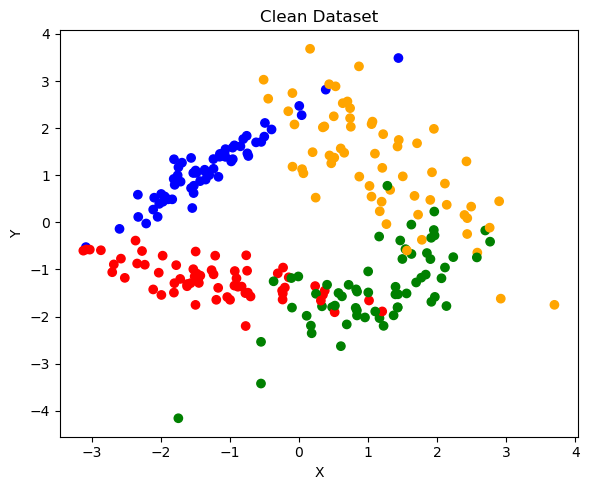

In [3]:
N_CLASSES = 4

# Create a 2D, 3-class dataset
X, y = make_classification(
    n_samples=250,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=N_CLASSES,
    n_clusters_per_class=1,
    random_state=42,
    class_sep=1.2,
    flip_y = 0
)

plot(X, y, "Clean Dataset")

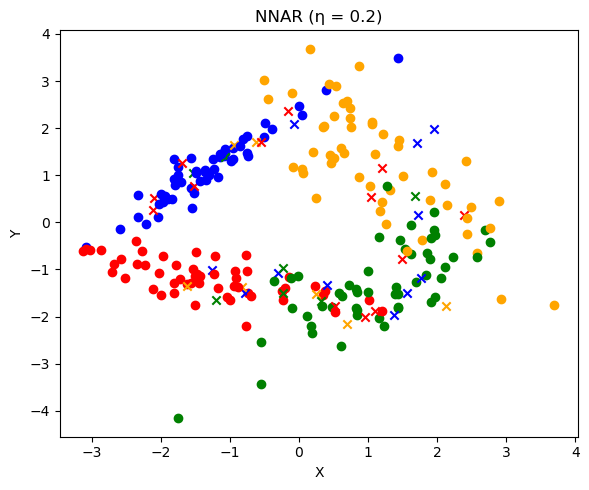

In [4]:
y_NCAR = symmetric_noise(np.copy(y), 0.15, N_CLASSES)
plot(X, y_NCAR, "NNAR (η = 0.2)", y)

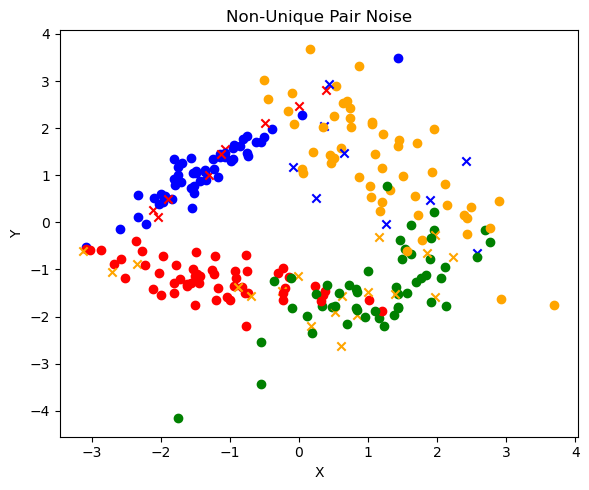

In [5]:
y_non_unique_pair = pair_noise(np.copy(y), 0.15, N_CLASSES)
plot(X, y_non_unique_pair, "Non-Unique Pair Noise", y)

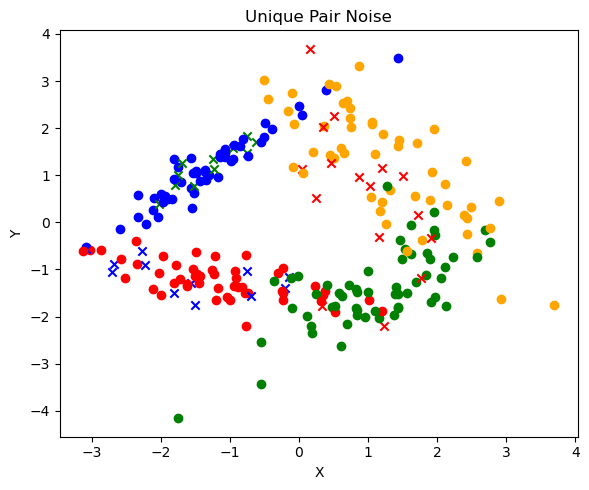

In [6]:
y_unique_pair = pair_noise(np.copy(y), 0.15, N_CLASSES, True)
plot(X, y_unique_pair, "Unique Pair Noise", y)

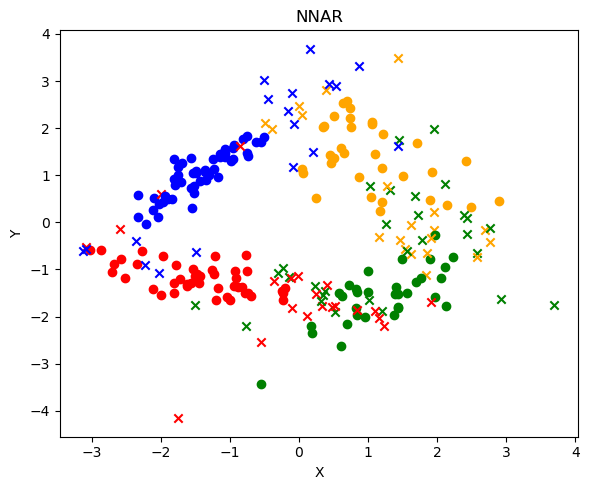

In [7]:
rf = RandomForestClassifier()
rf.fit(X,y)
y_NNAR = NNAR(np.copy(X), np.copy(y), rf , 9)
plot(X, y_NNAR, "NNAR", y)